In [1]:
%pip install qiskit[visualization]
%pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 24.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=9bce9eaceb25addf8e19358cf09e1028e925b5b1a0c48c0e20e6e58bfd4c71a7
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.2 MB/s eta 0:00:00:00:01:01
Note: you m

In [2]:
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator, Aer
import numpy as np

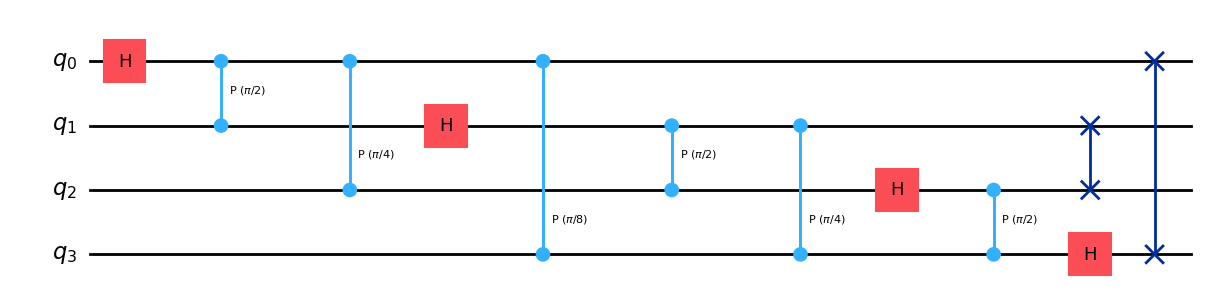

In [21]:
def qft_circuit(n):
    """Creates a Quantum Fourier Transform (QFT) circuit of n qubits."""
    qft = QuantumCircuit(n)
    
    # Apply QFT algorithm to each qubit
    for qubit in range(n):
        qft.h(qubit)  # Apply Hadamard gate
        for target in range(qubit + 1, n):
            qft.cp(np.pi / 2 ** (target - qubit),control_qubit=qubit, target_qubit=target)  # Apply controlled-U1 rotations

    # Apply a swap to reverse the qubits after QFT
    for qubit in range(n // 2):
        qft.swap(qubit, n - qubit - 1)

    return qft

# Example: Create a 4-qubit QFT circuit
n = 4
qft_circ = qft_circuit(n)
qft_circ.draw('mpl')


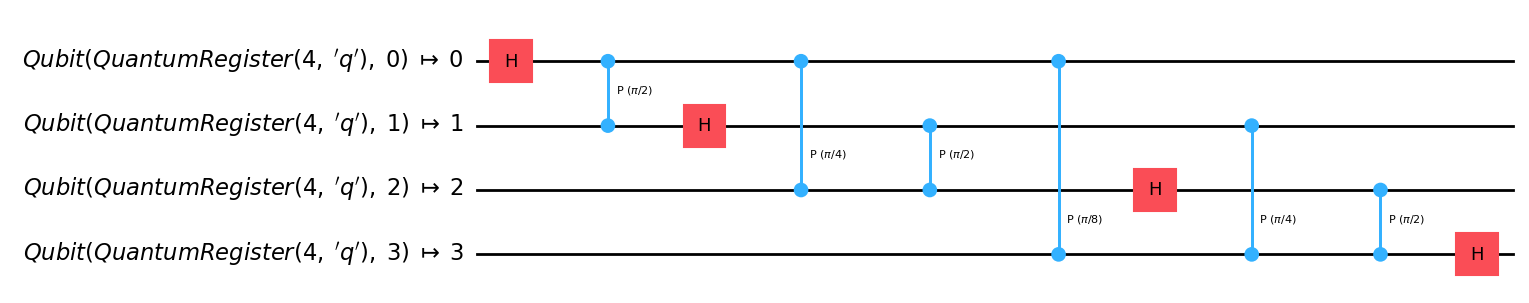

In [22]:
# Use a simulator backend to transpile the circuit
backend = Aer.get_backend('statevector_simulator')

# Transpile the circuit for optimization
transpiled_circuit = transpile(qft_circ, backend=backend, optimization_level=3)

# Show the transpiled circuit
transpiled_circuit.draw('mpl')


In [18]:
# Transpilation proposal
def my_transpile(qc):
    """Transpilation process for a quantum circuit."""
    
    optimized_circuit = QuantumCircuit(qc.num_qubits)
    
    # Track the last gate applied to each qubit
    last_gate = [None] * qc.num_qubits

    for instruction in qc.data:
        operation = instruction.operation  # The gate or operation being applied
        qubits = instruction.qubits        # Qubits the gate is acting on
        
        # Extract qubit indices using their register and index
        qubit_indices = [qc.find_bit(q).index for q in qubits]
        
        gate_name = operation.name
        
        # Check if we can optimize by removing consecutive identical gates
        can_optimize = True
        for qubit_index in qubit_indices:
            if last_gate[qubit_index] != gate_name:
                can_optimize = False
                break
        
        # If we can't optimize the gate, add it to the optimized circuit
        if not can_optimize:
            optimized_circuit.append(operation, qubit_indices)
            for qubit_index in qubit_indices:
                last_gate[qubit_index] = gate_name

    
    return optimized_circuit

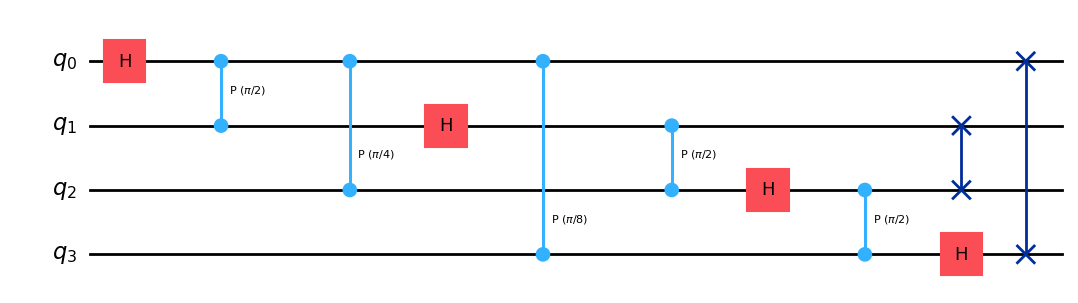

In [23]:
optimized_qft_circ = my_transpile(qft_circ)
optimized_qft_circ.draw('mpl')